In [153]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [154]:
df=pd.read_csv('/content/lung_cancer_survey.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [155]:
df.shape

(309, 16)

In [156]:
#Checking for Duplicates
df.duplicated().sum()

33

In [157]:
#Removing Duplicates
df=df.drop_duplicates()

In [158]:
#Checking for null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [160]:
df.describe()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


n this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.


In [161]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [162]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


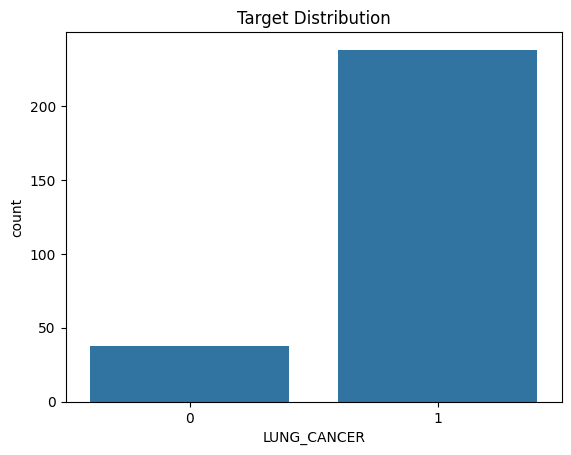

In [164]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [165]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


In [166]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

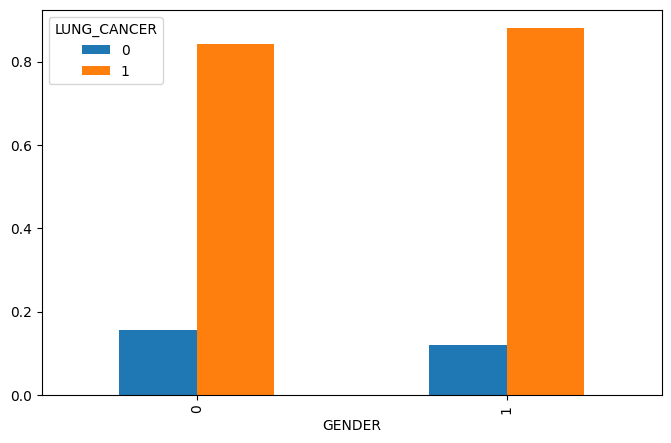

In [167]:
plot('GENDER')

<Axes: xlabel='SMOKING'>

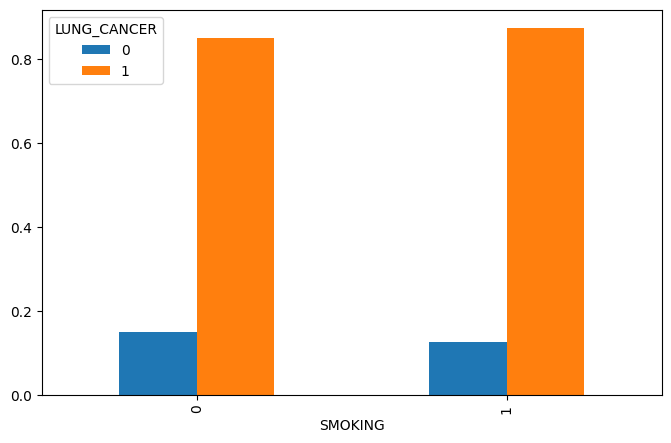

In [168]:
plot('SMOKING')

<Axes: xlabel='AGE'>

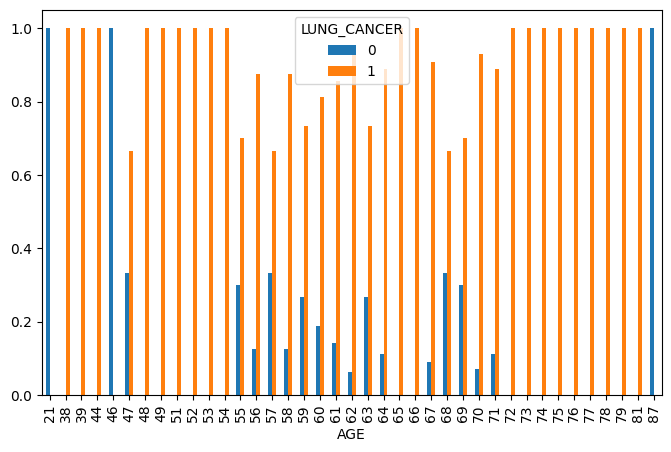

In [169]:
plot('AGE')

From the visualizations, it is clear that in the given dataset, the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.

In [170]:
df_new=df.drop(columns=['GENDER'])
df_new

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [171]:
#Finding Correlation
cn=df_new.corr()
cn

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.294422


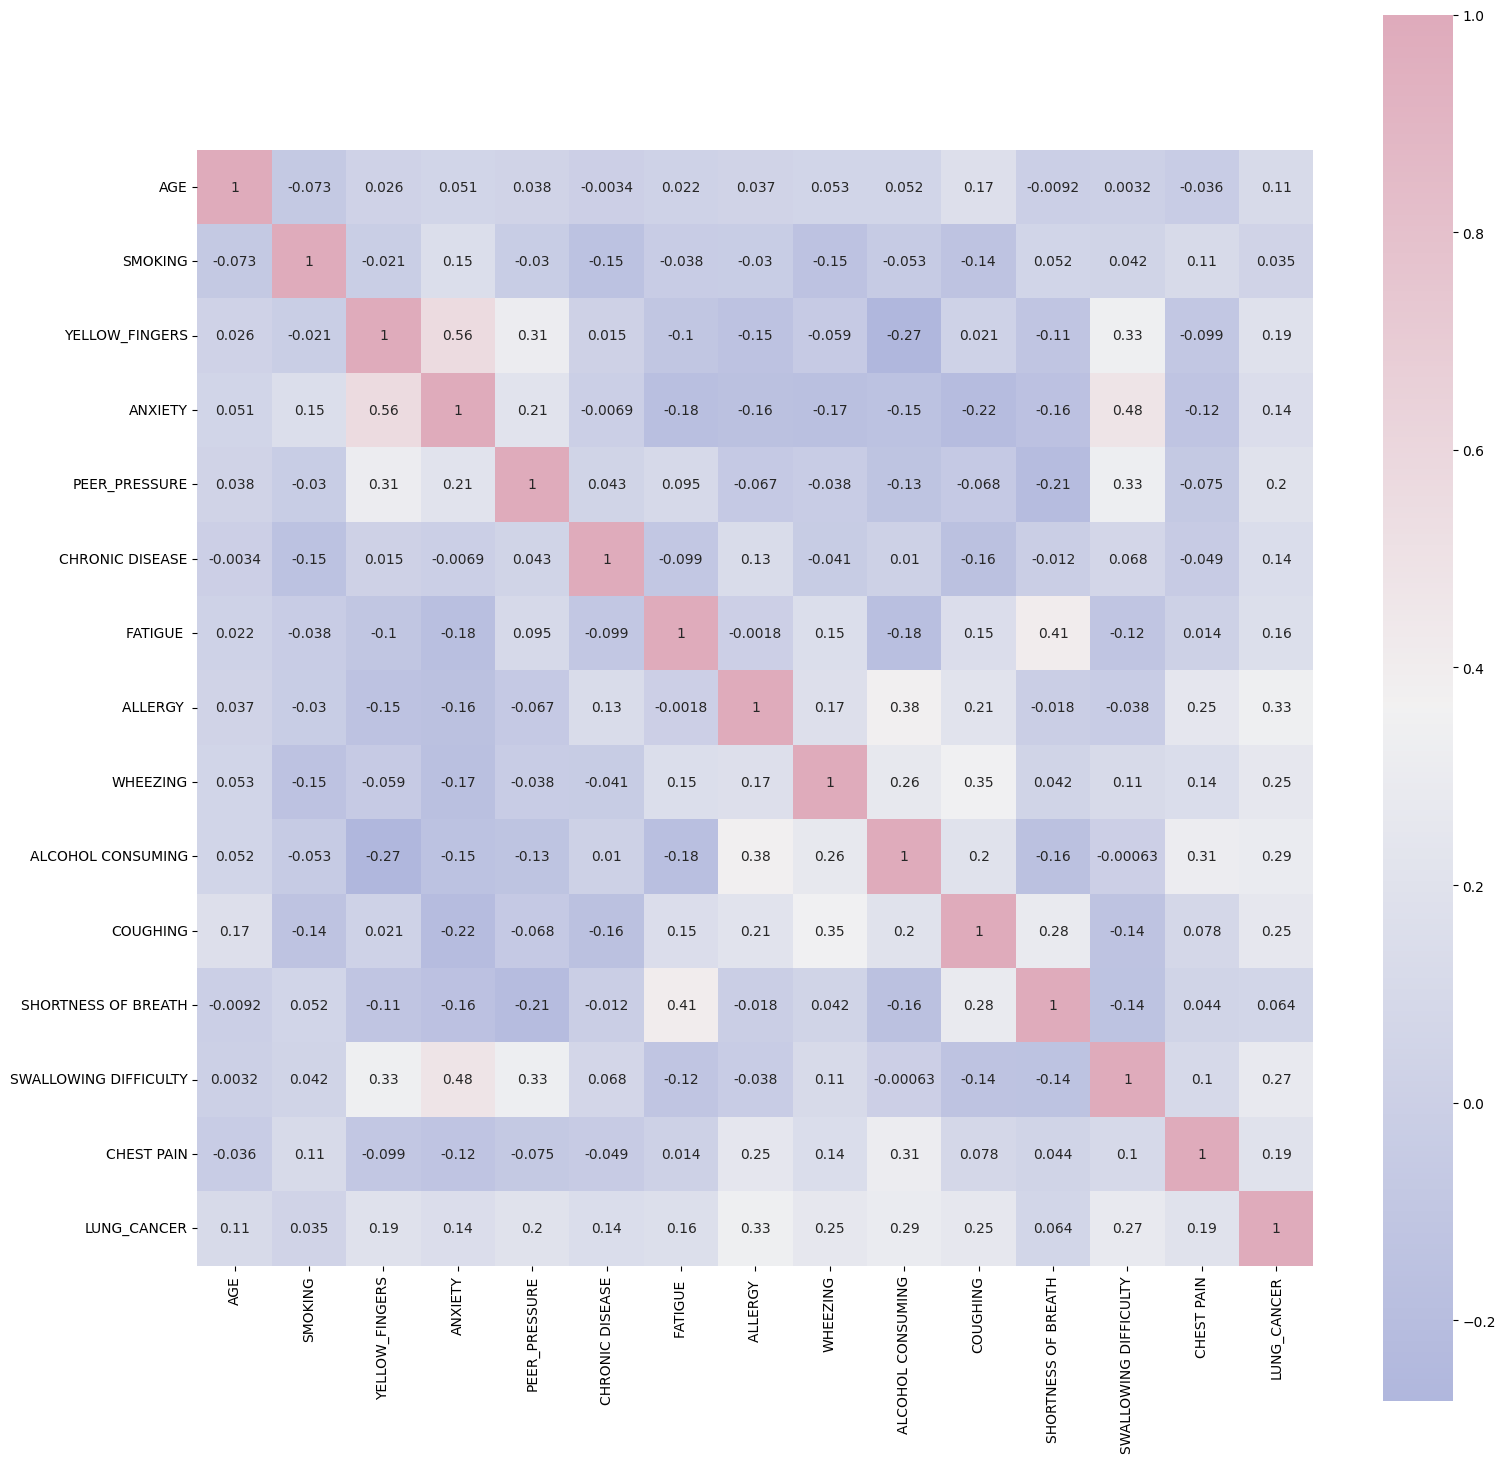

In [172]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

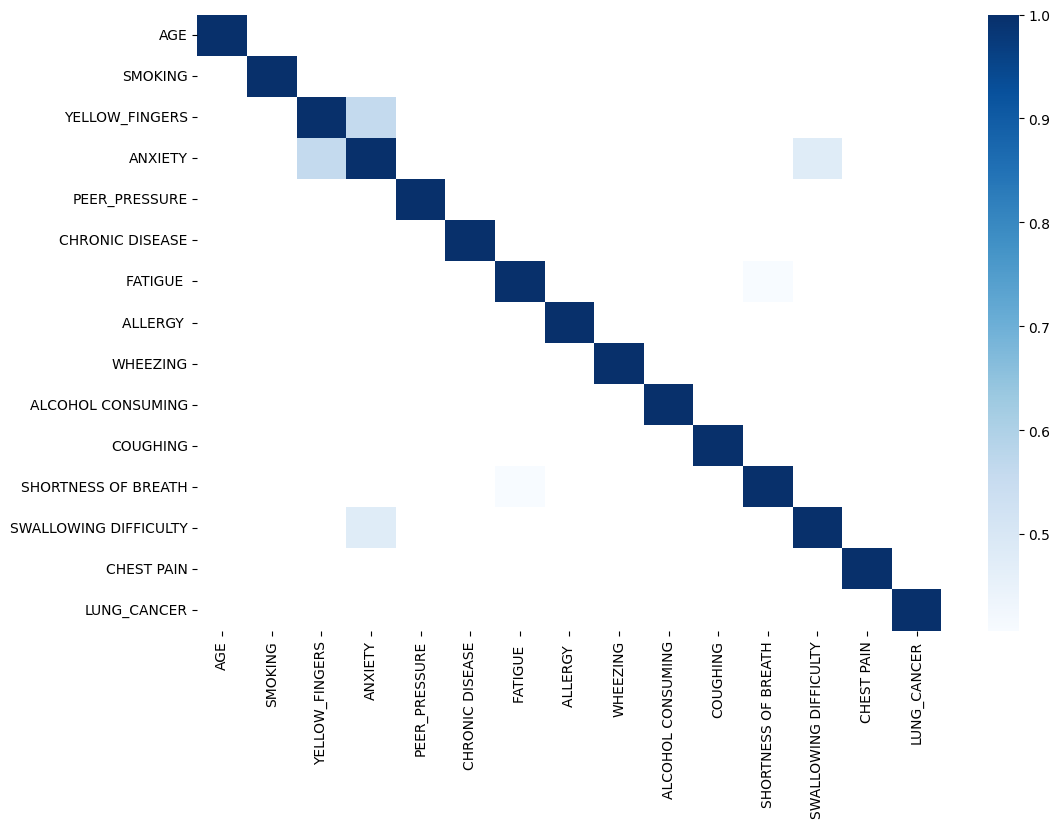

In [173]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [174]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1
280,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
281,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
282,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1


In [175]:
#drop the ANXYELFIN column
df_new=df_new.drop(columns=['ANXYELFIN'])
df_new

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [176]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

In [177]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [178]:
len(X)

477

**Logistic Regression**

In [179]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [180]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [181]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [182]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       1.00      0.96      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [183]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_lr_pred)
cm

array([[64,  0],
       [ 2, 54]])

**Decision Tree**

In [184]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [185]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [186]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.98      0.95      0.96        56

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [187]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_dt_pred)
cm


array([[63,  1],
       [ 3, 53]])

In [223]:
# Sample patient data (example values)
sample_data = np.array([[53, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]])  # Adjust these values based on your features

# Make a prediction
prediction = dt_model.predict(sample_data)
prediction_proba = dt_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 1 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: Cancer
Prediction Probability: 1.0


In [225]:
# Sample patient data (example values)
sample_data = np.array([[59, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2]])  # Adjust these values based on your features

# Make a prediction
prediction = dt_model.predict(sample_data)
prediction_proba = dt_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 0 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: No Cancer
Prediction Probability: 1.0


In [220]:
# Sample patient data (example values)
sample_data = np.array([[70, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2]])  # Adjust these values based on your features

# Make a prediction
prediction = dt_model.predict(sample_data)
prediction_proba = dt_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 1 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: Cancer
Prediction Probability: 1.0


In [221]:
# Sample patient data (example values)
sample_data = np.array([[68, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]])  # Adjust these values based on your features

# Make a prediction
prediction = dt_model.predict(sample_data)
prediction_proba = dt_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 1 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: Cancer
Prediction Probability: 1.0


In [219]:
# Sample patient data (example values)
sample_data = np.array([[62, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]])  # Adjust these values based on your features

# Make a prediction
prediction = dt_model.predict(sample_data)
prediction_proba = dt_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 1 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: Cancer
Prediction Probability: 1.0


In [226]:
#save the model
import pickle
filename='dt_model.pkl'
pickle.dump(dt_model,open(filename,'wb'))

**K Nearest Neighbor**

In [188]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [189]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [190]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.98      0.91      0.94        56

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [191]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_knn_pred)
cm

array([[63,  1],
       [ 5, 51]])

Support vector Classifier


In [192]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [193]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [194]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        64
           1       0.59      0.89      0.71        56

    accuracy                           0.66       120
   macro avg       0.71      0.67      0.65       120
weighted avg       0.72      0.66      0.64       120



In [195]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_svc_pred)
cm

array([[29, 35],
       [ 6, 50]])

**Random** **Forest**

In [196]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [197]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [198]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.98      1.00      0.99        56

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [199]:
#plotting a confusion matrix
from sklearn.metrics import pair_confusion_matrix
cm=confusion_matrix(y_test, y_rf_pred)
cm

array([[63,  1],
       [ 0, 56]])

In [208]:
import numpy as np
import matplotlib.pyplot as plt
input_data=(51,2,2,2,2,1,2,2,1,1,1,2,2,1)
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for one data pointi
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rf_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
  print("presence of lung cancer")
else:
    print("absence of lung cancer")

[1]
presence of lung cancer


In [204]:
import numpy as np

# Sample patient data based on the above variables
sample_data = np.array([[51,2,2,2,2,1,2,2,1,1,1,2,2,1]])

# Make a prediction
prediction = rf_model.predict(sample_data)
prediction_proba = rf_model.predict_proba(sample_data)

print("Prediction:", "Cancer" if prediction[0] == 1 else "No Cancer")
#print("Prediction Probability:", prediction_proba[0])


Prediction: Cancer


In [206]:
import numpy as np

# Sample patient data based on the above variables
sample_data = np.array([[68,2,1,2,1,1,2,1,1,1,1,1,1,2]])

# Make a prediction
prediction = rf_model.predict(sample_data)
prediction_proba = rf_model.predict_proba(sample_data)

print("Prediction:", "Cancer" if prediction[0] == 1 else "No Cancer")
#print("Prediction Probability:", prediction_proba[0])

Prediction: Cancer


In [209]:
import numpy as np

# Sample patient data
sample_data = np.array([[68, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]])

# Check the shape of sample_data to match the expected input shape
print("Sample data shape:", sample_data.shape)

# Make a prediction
prediction = rf_model.predict(sample_data)
prediction_proba = rf_model.predict_proba(sample_data)

# Print the prediction and probability
print("Prediction:", "Cancer" if prediction[0] == 0 else "No Cancer")
print("Prediction Probability:", prediction_proba[0])


Sample data shape: (1, 14)
Prediction: No Cancer
Prediction Probability: [0. 1.]


In [210]:
# Sample patient data (example values)
sample_data = np.array([[68, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]])  # Adjust these values based on your features

# Make a prediction
prediction = rf_model.predict(sample_data)
prediction_proba = rf_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 1 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: Cancer
Prediction Probability: 1.0


In [211]:
# Sample patient data (example values)
sample_data = np.array([[53, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]])  # Adjust these values based on your features

# Make a prediction
prediction = rf_model.predict(sample_data)
prediction_proba = rf_model.predict_proba(sample_data)

# Extract the probability for the predicted class
predicted_class = prediction[0]
predicted_class_proba = prediction_proba[0][predicted_class]

# Print the prediction and probability
print("Prediction:", "Cancer" if predicted_class == 1 else "No Cancer")
print("Prediction Probability:", predicted_class_proba)


Prediction: Cancer
Prediction Probability: 1.0


In [212]:
importances = rf_model.feature_importances_
for i, v in enumerate(importances):
    print(f"Feature: {i}, Score: {v:.5f}")


Feature: 0, Score: 0.08955
Feature: 1, Score: 0.01877
Feature: 2, Score: 0.06367
Feature: 3, Score: 0.03722
Feature: 4, Score: 0.07507
Feature: 5, Score: 0.06770
Feature: 6, Score: 0.03903
Feature: 7, Score: 0.16715
Feature: 8, Score: 0.05425
Feature: 9, Score: 0.11021
Feature: 10, Score: 0.09780
Feature: 11, Score: 0.02796
Feature: 12, Score: 0.11048
Feature: 13, Score: 0.04114


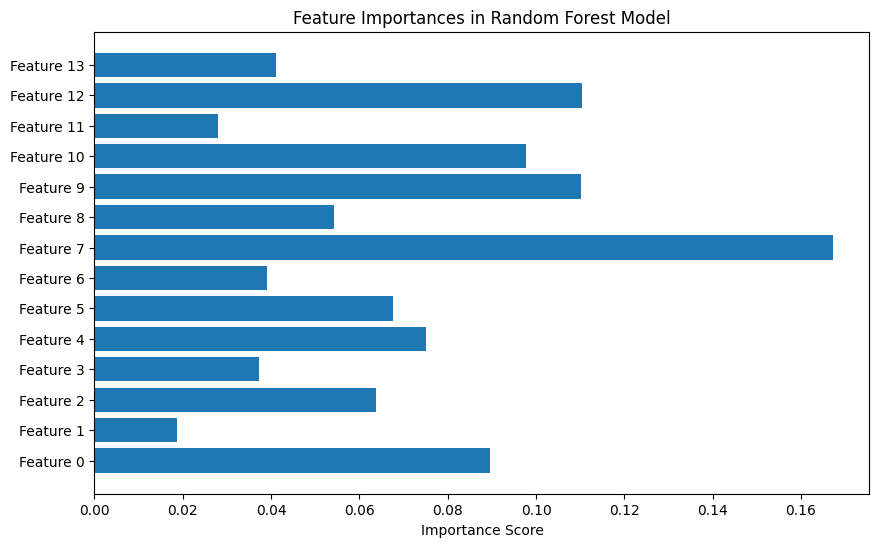

In [213]:
import matplotlib.pyplot as plt

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), [f'Feature {i}' for i in range(len(importances))])
plt.xlabel('Importance Score')
plt.title('Feature Importances in Random Forest Model')
plt.show()
